# 📄 **Descrição Geral**
Este script utiliza o algoritmo **K-Means** para **segmentar dados** em grupos (**clusters**), com o objetivo de explorar como a escolha do número de clusters (**K**) afeta a segmentação. Utiliza **dados simulados** para demonstrar a **eficácia da clusterização** e a avaliação das **métricas de homogeneidade**, **completude** e **inércia**. O script também mostra como essas métricas podem ajudar a avaliar a **qualidade dos clusters** formados.

---

# 🎯 **Objetivo**
O objetivo deste script é:
- **Segmentar dados em clusters** utilizando o algoritmo **K-Means** e **visualizar** a formação dos clusters.
- **Avaliar o desempenho da clusterização** com base em **métricas** como homogeneidade, completude e inércia.
- **Analisar a variação no número de clusters (K)** e sua **influência** na qualidade dos agrupamentos.

---

# 🔢 **Bloco 1: Importação das Bibliotecas e Geração de Dados**

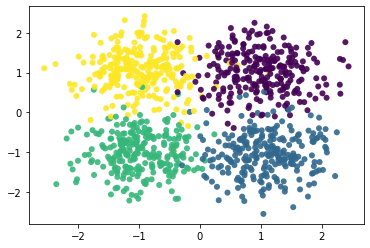

In [2]:
# Imports das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_completeness_v_measure
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Geração de dados sintéticos para clustering
from sklearn.datasets import make_blobs  # Correção na importação

# Definindo manualmente os centros dos clusters
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]

# Gerando os dados
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.5, random_state=101)

# Plotando os dados gerados
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='none', alpha=0.9)
plt.show()


### 🔍 **Objetivo:**
- **Importar as bibliotecas necessárias** para a criação e visualização dos dados.
- **Gerar dados sintéticos** (com **1000 amostras**) com **4 centros (clusters)** usando `make_blobs`.
- **Exibir o gráfico de dispersão** com as amostras geradas.

---

# 🔄 **Bloco 2: Geração dos Clusters e Visualização das Células de Voronoi**

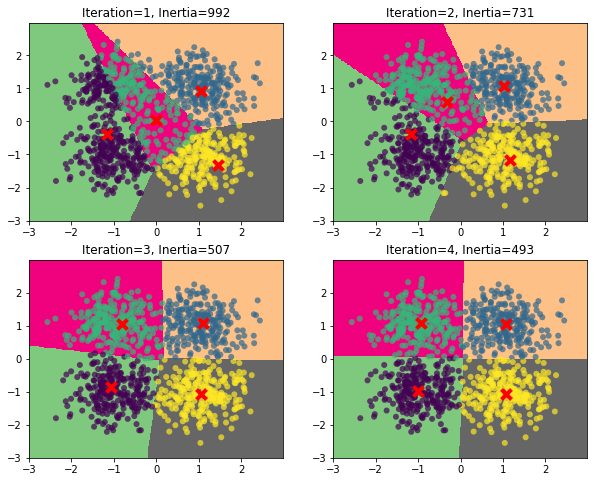

In [3]:
# Ajustando o tamanho da figura
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Loop para treinar o modelo KMeans com diferentes iterações
for n_iter in range(1, 5):
    # Criando o modelo KMeans
    modelo = KMeans(n_clusters=4, max_iter=n_iter, n_init=1, init='random', random_state=101)
    modelo.fit(X)
    
    # Plotando as células de Voronoi para cada iteração
    plt.subplot(2, 2, n_iter)
    h = 0.02
    xx, yy = np.meshgrid(np.arange(-3, 3, h), np.arange(-3, 3, h))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.imshow(Z, interpolation='nearest', cmap=plt.cm.Accent, extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto', origin='lower')

    # Plotando os pontos e os centros dos clusters
    plt.scatter(X[:, 0], X[:, 1], c=modelo.labels_, edgecolors='none', alpha=0.7)
    plt.scatter(modelo.cluster_centers_[:, 0], modelo.cluster_centers_[:, 1], marker='x', color='r', s=100, linewidths=4)
    plt.title("Iteration=%s, Inertia=%s" % (n_iter, int(modelo.inertia_)))

plt.show()

### 🔍 **Objetivo:**
- **Visualizar os clusters gerados** com base nas iterações do algoritmo **K-Means**.
- **Exibir as células de Voronoi**, que mostram a **região atribuída a cada cluster**.
- **Analisar a inércia** (soma das distâncias das amostras ao centro do cluster) em cada iteração.

---

# 🔄 **Bloco 3: Comparação com Diferentes Valores de K**

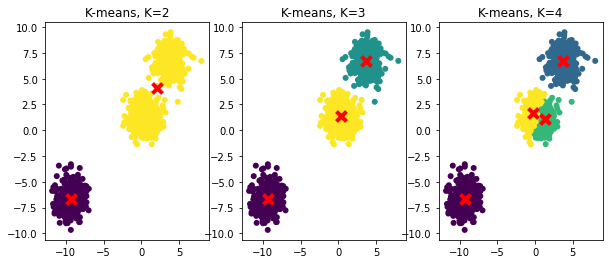

In [4]:
# Ajustando o tamanho da figura
pylab.rcParams['figure.figsize'] = (10.0, 4.0)

# Gerando uma nova massa de dados com 3 centros
X, _ = make_blobs(n_samples=1000, centers=3, random_state=101)

# Loop para testar diferentes valores de K (2, 3, 4)
for K in [2, 3, 4]:
    # Criando o modelo KMeans
    modelo = KMeans(n_clusters=K, random_state=101)
    y_pred = modelo.fit_predict(X)
    
    # Plotando os resultados de clustering
    plt.subplot(1, 3, K-1)
    plt.title("K-means, K=%s" % K)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='none')
    plt.scatter(modelo.cluster_centers_[:, 0], modelo.cluster_centers_[:, 1], marker='x', color='r', s=100, linewidths=4)

plt.show()

### 🔍 **Objetivo:**
- **Comparar os resultados** da clusterização para diferentes números de clusters (**K = 2, 3, 4**).
- **Visualizar** como o número de clusters afeta a **separação dos dados**.

---

# 📊 **Bloco 4: Análise de Homogeneidade, Completude e Medida V**

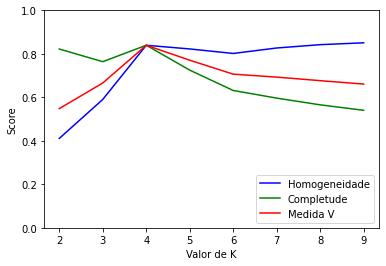

In [5]:
# Ajustando o tamanho da figura
pylab.rcParams['figure.figsize'] = (6.0, 4.0)

# Gerando a massa de dados
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.5, random_state=101)

# Valores de K a testar
valores_k = range(2, 10)

# Lista para armazenar as métricas
HCVs = []

# Calculando as métricas para cada valor de K
for K in valores_k:
    y_pred = KMeans(n_clusters=K, random_state=101).fit_predict(X)
    HCVs.append(homogeneity_completeness_v_measure(y, y_pred))

# Plotando as métricas
plt.plot(valores_k, [el[0] for el in HCVs], 'b', label='Homogeneidade')
plt.plot(valores_k, [el[1] for el in HCVs], 'g', label='Completude')
plt.plot(valores_k, [el[2] for el in HCVs], 'r', label='Medida V')
plt.ylim([0, 1])
plt.xlabel("Valor de K")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

### 🔍 **Objetivo:**
- Avaliar a **homogeneidade** (quanto os pontos de um cluster pertencem à mesma classe) e a **completude** (quanto os pontos de uma classe estão no mesmo cluster).
- A **Medida V** é a média das duas métricas anteriores.
- Analisar como essas métricas variam com o **número de clusters (K)**.

---

# 📈 **Bloco 5: Avaliação da Inércia para Diferentes Valores de K**

In [ ]:
# Calculando a Inércia para diferentes valores de K
Ks = range(2, 10)
valores_metrica = []

# Loop por diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters=K, random_state=101)
    modelo.fit(X)
    valores_metrica.append(modelo.inertia_)

# Plotando a inércia
plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()


### 🔍 **Objetivo:**
- Avaliar a **inércia** (soma das distâncias das amostras ao centro do cluster) para diferentes valores de **K**.
- O **gráfico de inércia** ajuda a identificar o ponto em que o número de clusters começa a gerar menores ganhos de desempenho (curva do "Elbow").

---

# 🎯 **Conclusão**
Este script demonstrou como aplicar o algoritmo **K-Means** para **segmentação de dados** e como avaliar a **qualidade da clusterização** utilizando várias métricas. Além disso, exploramos como a escolha do **número de clusters (K)** impacta os resultados e as métricas associadas. Com base nas análises de **homogeneidade**, **completude**, **medida V** e **inércia**, é possível tomar decisões informadas sobre o número ideal de clusters para segmentar os dados de forma eficaz.
